In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [34]:
df.drop('id', axis=1, inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


---
---

# **Data Preprocessing**

- #### **1. Checking for null values**

In [36]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

we will fill the null values in `bmi` column using KNNInputer in the pipeline

In [37]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [38]:
df['smoking_status'].replace('Unknown', np.nan, inplace=True)
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

there was a unknown values in the `smoking_status` column and to fill this values we should first replace it with NaN the we fill NaN values using mode method

- #### **2. Checking for duplicated  rows**

In [39]:
df.duplicated().sum()

0

there is no duplicated rows to remove 

- #### **3. Check if the data balanced or not**

In [40]:
df['stroke'].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

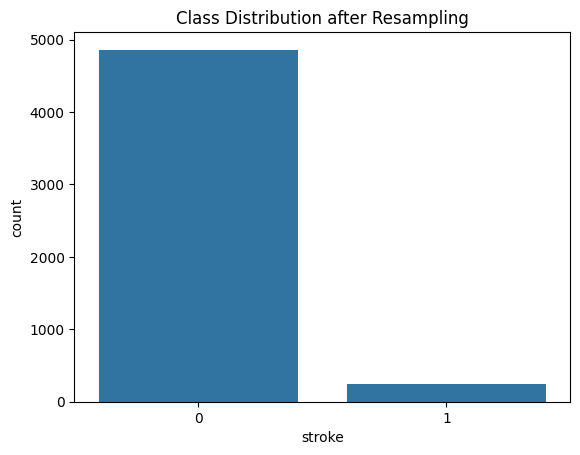

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


# Check for class distribution after resampling
sns.countplot(x=df['stroke'])
plt.title('Class Distribution after Resampling')
plt.show()

The data is not balanced and we will fix that next in the pipeline using `ADASYN`

---
---

##### **Feature Engineering**
We create age groups by splitting ages into bins:
- Child: 0-18
- Adult: 19-45
- Senior: 46-60
- Elderly: 61-100

- **The data before doing Feature Engineering**

In [42]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [43]:
age_bins = [0, 18, 45, 60, 100]
age_labels = ['Child', 'Adult', 'Senior', 'Elderly']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


- **The data After doing Feature Engineering**

In [44]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Elderly
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly


- **then we will drop the `age` column and show the data**

In [45]:
df.drop('age', axis = 1, inplace = True)

In [46]:
df.head(3)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Elderly
2,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             5110 non-null   object  
 1   hypertension       5110 non-null   int64   
 2   heart_disease      5110 non-null   int64   
 3   ever_married       5110 non-null   object  
 4   work_type          5110 non-null   object  
 5   Residence_type     5110 non-null   object  
 6   avg_glucose_level  5110 non-null   float64 
 7   bmi                4909 non-null   float64 
 8   smoking_status     5110 non-null   object  
 9   stroke             5110 non-null   int64   
 10  age_group          5110 non-null   category
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 404.5+ KB


- **rename the `age_group` column to `age` column and convert it's data type from `category` to `object`**

In [48]:
# rename `age_group` column to `age` column
df.rename(columns={'age_group': 'age'}, inplace=True)

# convert it's data type from `category` to `object`
df['age'] = df['age'].astype(object)

In [49]:
df.head(3)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age
0,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Elderly
1,Female,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Elderly
2,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Elderly


In [50]:
df['age'].value_counts()

age
Adult      1702
Elderly    1304
Senior     1188
Child       916
Name: count, dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   ever_married       5110 non-null   object 
 4   work_type          5110 non-null   object 
 5   Residence_type     5110 non-null   object 
 6   avg_glucose_level  5110 non-null   float64
 7   bmi                4909 non-null   float64
 8   smoking_status     5110 non-null   object 
 9   stroke             5110 non-null   int64  
 10  age                5110 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 439.3+ KB


---
---

# **Preparation**

- #### **1. Categorical Columns**

In [52]:
cate_columns = df.select_dtypes(include='object').columns.to_list()



In [53]:
unique_values = {col: df[col].unique() for col in cate_columns}
unique_values

{'gender': array(['Male', 'Female', 'Other'], dtype=object),
 'ever_married': array(['Yes', 'No'], dtype=object),
 'work_type': array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
       dtype=object),
 'Residence_type': array(['Urban', 'Rural'], dtype=object),
 'smoking_status': array(['formerly smoked', 'never smoked', 'smokes'], dtype=object),
 'age': array(['Elderly', 'Senior', 'Adult', 'Child'], dtype=object)}

In [54]:
for col, values in unique_values.items():
    print(f"{col}: {values}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes']
age: ['Elderly' 'Senior' 'Adult' 'Child']


In [55]:
df[cate_columns].head()

,gender,ever_married,work_type,Residence_type,smoking_status,age
0,Male,Yes,Private,Urban,formerly smoked,Elderly
1,Female,Yes,Self-employed,Rural,never smoked,Elderly
2,Male,Yes,Private,Rural,never smoked,Elderly
3,Female,Yes,Private,Urban,smokes,Senior
4,Female,Yes,Self-employed,Rural,never smoked,Elderly


- #### **2. Numerical Columns**

In [56]:
num_columns = df.select_dtypes(exclude='object').columns.to_list()
num_columns.remove('stroke')

In [57]:
num_columns

['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [58]:
df[cate_columns].describe()

,gender,ever_married,work_type,Residence_type,smoking_status,age
count,5110,5110,5110,5110,5110,5110
unique,3,2,5,2,3,4
top,Female,Yes,Private,Urban,never smoked,Adult
freq,2994,3353,2925,2596,3436,1702


In [59]:
df[num_columns].describe()

,hypertension,heart_disease,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,0.097456,0.054012,106.147677,28.893237
std,0.296607,0.226063,45.283560,7.854067
min,0.000000,0.000000,55.120000,10.300000
25%,0.000000,0.000000,77.245000,23.500000
50%,0.000000,0.000000,91.885000,28.100000
75%,0.000000,0.000000,114.090000,33.100000
max,1.000000,1.000000,271.740000,97.600000


- #### **3. Checking for outliers**

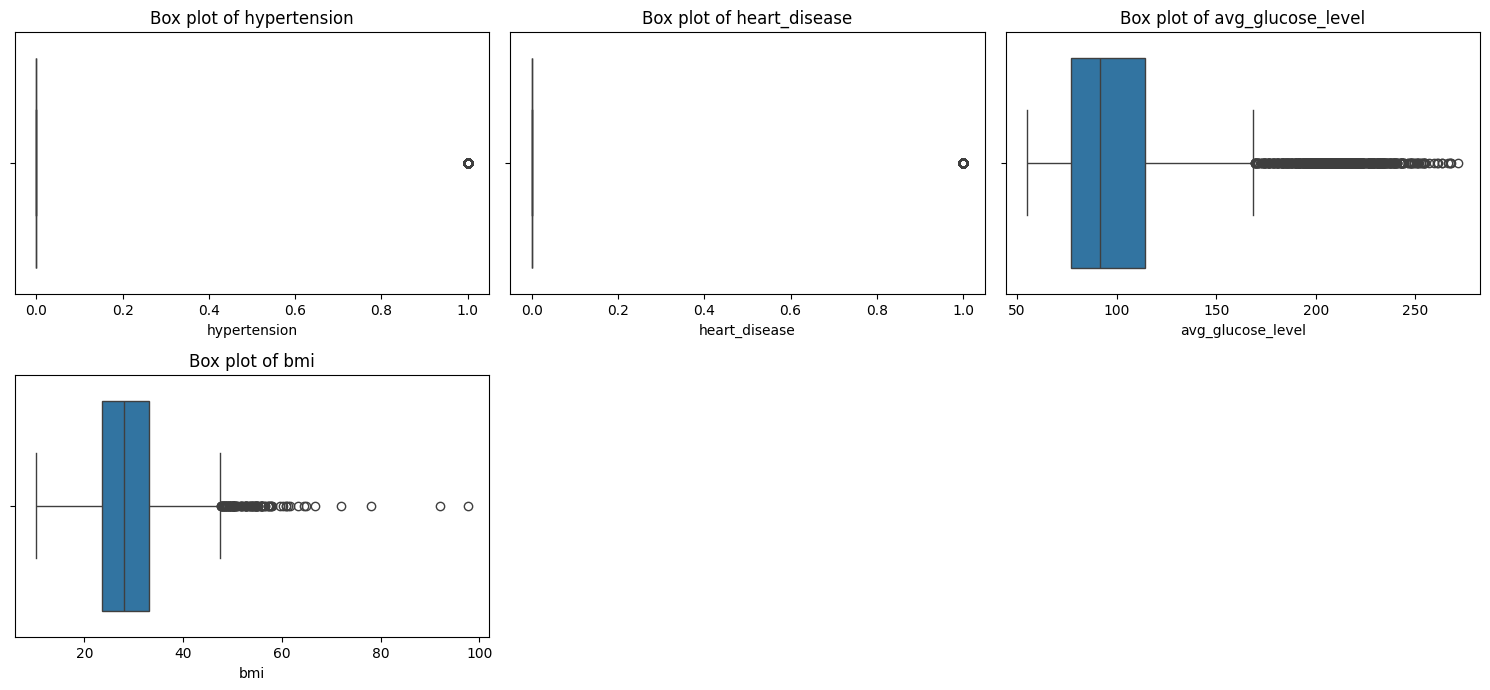

In [60]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


As You See there are outliers in `bmi` and `avg_glucose_level` columns but we decided no to remove them because Their number is too many for our data.

In [61]:
df[num_columns]

,hypertension,heart_disease,avg_glucose_level,bmi
0,0,1,228.69,36.6
1,0,0,202.21,NaN
2,0,1,105.92,32.5
3,0,0,171.23,34.4
4,1,0,174.12,24.0
...,...,...,...,...
5105,1,0,83.75,NaN
5106,0,0,125.20,40.0
5107,0,0,82.99,30.6
5108,0,0,166.29,25.6


In [62]:
df[cate_columns]

,gender,ever_married,work_type,Residence_type,smoking_status,age
0,Male,Yes,Private,Urban,formerly smoked,Elderly
1,Female,Yes,Self-employed,Rural,never smoked,Elderly
2,Male,Yes,Private,Rural,never smoked,Elderly
3,Female,Yes,Private,Urban,smokes,Senior
4,Female,Yes,Self-employed,Rural,never smoked,Elderly
...,...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked,Elderly
5106,Female,Yes,Self-employed,Urban,never smoked,Elderly
5107,Female,Yes,Self-employed,Rural,never smoked,Adult
5108,Male,Yes,Private,Rural,formerly smoked,Senior


In [63]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [64]:
import pandas as pd

# Assuming 'df' is your DataFrame after preprocessing
df.to_csv('preprocessed_stroke_data.csv', index=False)

print("Data saved successfully to 'preprocessed_data.csv'")


Data saved successfully to 'preprocessed_data.csv'


---
---

## **Pipeline**

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,  RobustScaler
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Numerical pipeline
num_pipeline = Pipeline([
    ('numerical_inputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

# Categorical pipeline
cate_pipeline = Pipeline([
    ('one_hot_encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

# Preprocessing: combining both numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num_pipeline', num_pipeline, num_columns),
    ('cate_pipeline', cate_pipeline, cate_columns)
]).set_output(transform='pandas')


# Full pipeline with SMOTE
model_pipeline = ImbPipeline([
    ('preprocessing', preprocessor),  # Step 1: Apply preprocessing (scaling, encoding, etc.)
    ('smote', ADASYN(random_state=42)),  # Step 2: Apply SMOTE to resample the training data
    
])

# Fit and resample the training data using the full pipeline
x_train_resampled, y_train_resampled = model_pipeline.fit_resample(x_train, y_train)

# Transform the test data (without applying SMOTE to test data)
x_test_preprocessed = preprocessor.transform(x_test)

# At this point, you can train your model using x_train_resampled and y_train_resampled.




In [66]:
# Display resampled data info
print(f"Original data shape: {x_train.shape}, Resampled data shape: {x_train_resampled.shape}")


Original data shape: (4088, 10), Resampled data shape: (7841, 22)


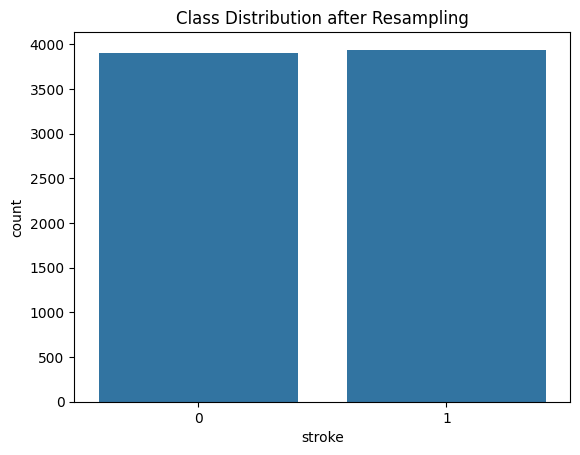

In [67]:
# Check for class distribution after resampling
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution after Resampling')
plt.show()

In [68]:
print(y_train_resampled.value_counts())


stroke
1    3940
0    3901
Name: count, dtype: int64


In [69]:
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [70]:
x_train_resampled

,num_pipeline__hypertension,num_pipeline__heart_disease,num_pipeline__avg_glucose_level,num_pipeline__bmi,cate_pipeline__gender_Female,cate_pipeline__gender_Male,cate_pipeline__ever_married_No,cate_pipeline__ever_married_Yes,cate_pipeline__work_type_Govt_job,cate_pipeline__work_type_Never_worked,...,cate_pipeline__work_type_children,cate_pipeline__Residence_type_Rural,cate_pipeline__Residence_type_Urban,cate_pipeline__smoking_status_formerly smoked,cate_pipeline__smoking_status_never smoked,cate_pipeline__smoking_status_smokes,cate_pipeline__age_Adult,cate_pipeline__age_Child,cate_pipeline__age_Elderly,cate_pipeline__age_Senior
0,0.000000,0.0,0.552905,0.043478,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.0,-0.095283,0.891304,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.0,-0.862873,0.608696,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.000000,0.0,-0.698161,0.250000,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.000000,0.0,-0.859941,-0.891304,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7836,0.755460,0.0,2.697138,0.830644,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7837,0.772678,0.0,2.745218,0.982228,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7838,0.660763,0.0,2.807618,1.016290,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7839,0.501801,0.0,2.542253,0.425675,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [71]:
x_train_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7841 entries, 0 to 7840
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   num_pipeline__hypertension                     7841 non-null   float64
 1   num_pipeline__heart_disease                    7841 non-null   float64
 2   num_pipeline__avg_glucose_level                7841 non-null   float64
 3   num_pipeline__bmi                              7841 non-null   float64
 4   cate_pipeline__gender_Female                   7841 non-null   float64
 5   cate_pipeline__gender_Male                     7841 non-null   float64
 6   cate_pipeline__ever_married_No                 7841 non-null   float64
 7   cate_pipeline__ever_married_Yes                7841 non-null   float64
 8   cate_pipeline__work_type_Govt_job              7841 non-null   float64
 9   cate_pipeline__work_type_Never_worked          7841 

---
---

### **Neural Network**

In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping

# Prepare for K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store validation accuracies and models
val_accuracies = []
models = []

# Loop through each fold in K-Fold Cross-Validation
for train_index, val_index in kf.split(x_train_resampled):
    x_train_cv, x_val_cv = x_train_resampled.iloc[train_index], x_train_resampled.iloc[val_index]
    y_train_cv, y_val_cv = y_train_resampled.iloc[train_index], y_train_resampled.iloc[val_index]

    # Define the model
    model = keras.Sequential([
        layers.Input(shape=(x_train_cv.shape[1],)),
        layers.Dense(256, kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.01),
        layers.BatchNormalization(),
        layers.Dropout(0.4),
        
        layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.01),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001)),
        layers.LeakyReLU(alpha=0.01),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model with a smaller learning rate
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

    # Set up early stopping, monitoring val_accuracy
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

    # Train the model
    model.fit(x_train_cv, y_train_cv, epochs=200, batch_size=32, 
              validation_data=(x_val_cv, y_val_cv), callbacks=[early_stopping])

    # Evaluate the model on validation set
    val_loss, val_accuracy = model.evaluate(x_val_cv, y_val_cv)
    print(f'Validation Accuracy for this fold: {val_accuracy:.4f}')

    # Store the model and its validation accuracy
    val_accuracies.append(val_accuracy)
    models.append(model)

# Calculate the average validation accuracy across all folds
average_accuracy = np.mean(val_accuracies)
print(f'Average Validation Accuracy: {average_accuracy:.4f}')

# Find the model closest to the average accuracy
closest_index = np.argmin(np.abs(np.array(val_accuracies) - average_accuracy))
best_model = models[closest_index]
print(f'Model closest to the average accuracy is from fold {closest_index + 1}.')

# Train the selected model on the entire resampled training data
best_model.fit(x_train_resampled, y_train_resampled, epochs=300, batch_size=32, callbacks=[early_stopping])

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(x_test_preprocessed, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Make predictions on test data
predictions = best_model.predict(x_test_preprocessed)
predicted_classes = (predictions > 0.5).astype("int32")


c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6460 - loss: 1.0209 - val_accuracy: 0.5857 - val_loss: 0.9460
Epoch 2/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7651 - loss: 0.8194 - val_accuracy: 0.7553 - val_loss: 0.7850
Epoch 3/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7789 - loss: 0.7768 - val_accuracy: 0.7871 - val_loss: 0.7161
Epoch 4/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7910 - loss: 0.7602 - val_accuracy: 0.7980 - val_loss: 0.6887
Epoch 5/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7914 - loss: 0.7313 - val_accuracy: 0.8094 - val_loss: 0.6698
Epoch 6/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7968 - loss: 0.6935 - val_accuracy: 0.8177 - val_loss: 0.6569
Epoch 7/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8103 - loss: 0.6871 - val_accuracy: 0.8273 - val_loss: 0.6262
Epoch 8/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8115 - loss: 0.6666 - val_accu

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6291 - loss: 1.0592 - val_accuracy: 0.7608 - val_loss: 0.8197
Epoch 2/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7604 - loss: 0.7982 - val_accuracy: 0.7864 - val_loss: 0.7460
Epoch 3/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7570 - loss: 0.7923 - val_accuracy: 0.8068 - val_loss: 0.7149
Epoch 4/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7905 - loss: 0.7352 - val_accuracy: 0.8221 - val_loss: 0.6825
Epoch 5/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7852 - loss: 0.7391 - val_accuracy: 0.8259 - val_loss: 0.6551
Epoch 6/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8024 - loss: 0.6976 - val_accuracy: 0.8304 - val_loss: 0.6511
Epoch 7/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8007 - loss: 0.6959 - val_accuracy: 0.8342 - val_loss: 0.6260
Epoch 8/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8151 - loss: 0.6629 - val_accuracy: 0.8380

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6388 - loss: 1.0273 - val_accuracy: 0.6862 - val_loss: 0.8840
Epoch 2/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7517 - loss: 0.8276 - val_accuracy: 0.7857 - val_loss: 0.7617
Epoch 3/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7801 - loss: 0.7791 - val_accuracy: 0.8112 - val_loss: 0.6881
Epoch 4/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7991 - loss: 0.7420 - val_accuracy: 0.8170 - val_loss: 0.6603
Epoch 5/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7885 - loss: 0.7314 - val_accuracy: 0.8272 - val_loss: 0.6424
Epoch 6/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8049 - loss: 0.6925 - val_accuracy: 0.8310 - val_loss: 0.6133
Epoch 7/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8153 - loss: 0.6609 - val_accuracy: 0.8329 - val_loss: 0.6039
Epoch 8/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8163 - loss: 0.6519 - val_accuracy: 0.8469

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6436 - loss: 1.0032 - val_accuracy: 0.7392 - val_loss: 0.8661
Epoch 2/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 0.8224 - val_accuracy: 0.7628 - val_loss: 0.7845
Epoch 3/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7737 - loss: 0.7852 - val_accuracy: 0.7864 - val_loss: 0.7336
Epoch 4/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7733 - loss: 0.7588 - val_accuracy: 0.8029 - val_loss: 0.7018
Epoch 5/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7923 - loss: 0.7217 - val_accuracy: 0.8106 - val_loss: 0.6738
Epoch 6/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8008 - loss: 0.6963 - val_accuracy: 0.8138 - val_loss: 0.6667
Epoch 7/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8070 - loss: 0.6711 - val_accuracy: 0.8233 - val_loss: 0.6441
Epoch 8/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8043 - loss: 0.6759 - val_accuracy: 0.8284

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6331 - loss: 1.0408 - val_accuracy: 0.7423 - val_loss: 0.8388
Epoch 2/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7513 - loss: 0.8376 - val_accuracy: 0.7997 - val_loss: 0.7169
Epoch 3/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7741 - loss: 0.7655 - val_accuracy: 0.8291 - val_loss: 0.6621
Epoch 4/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 0.7614 - val_accuracy: 0.8399 - val_loss: 0.6343
Epoch 5/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7822 - loss: 0.7287 - val_accuracy: 0.8527 - val_loss: 0.6196
Epoch 6/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.6900 - val_accuracy: 0.8610 - val_loss: 0.5979
Epoch 7/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.6723 - val_accuracy: 0.8597 - val_loss: 0.5841
Epoch 8/200
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8242 - loss: 0.6457 - val_accuracy: 0.8616

c:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9368 - loss: 0.2131
Epoch 3/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9408 - loss: 0.2130
Epoch 4/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9388 - loss: 0.2192
Epoch 5/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9446 - loss: 0.2102
Epoch 6/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9357 - loss: 0.2189
Epoch 7/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9393 - loss: 0.2104
Epoch 8/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9368 - loss: 0.2173
Epoch 9/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9398 - loss: 0.2126
Epoch 10/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9382 - loss: 0.2250
Epoch 11/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9410 - loss: 0.2117
Epoch 12/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9420 - loss: 0.2102
Epoch 13/300
246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:



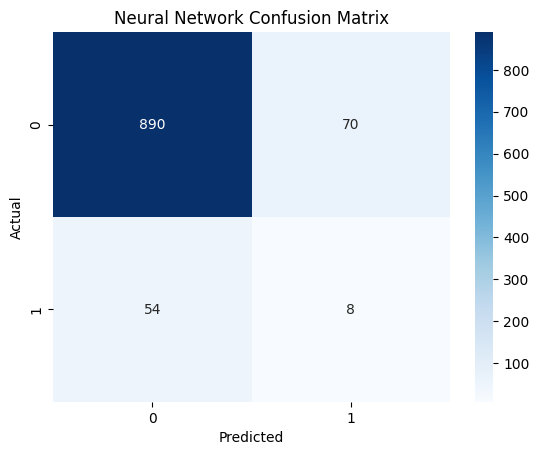

In [73]:
from sklearn.metrics import confusion_matrix

# Make predictions on test data
predictions = best_model.predict(x_test_preprocessed)
predicted_classes = (predictions > 0.5).astype("int32")

# Print confusion matrix
print("Confusion Matrix:\n")

sns.heatmap(confusion_matrix(y_test, predicted_classes), annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [74]:
print("\nClassification Report: For Neural Network")
print(classification_report(y_test, predicted_classes, target_names=["Class 0", "Class 1"]))


Classification Report: For Neural Network
              precision    recall  f1-score   support

     Class 0       0.94      0.93      0.93       960
     Class 1       0.10      0.13      0.11        62

    accuracy                           0.88      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.89      0.88      0.89      1022



---
---

In [75]:
from re import S
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

### **Logistic Regression**

In [76]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns




# 7. Initialize Logistic Regression with Class Weights
# Class weights help the model pay more attention to the minority class
logreg = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=300)

# 8. Define Hyperparameter Grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],              # Inverse of regularization strength
    'penalty': ['l1', 'l2'],                   # Regularization penalties
    'solver': ['liblinear', 'saga'],           # Solvers compatible with penalties
    'max_iter': [300, 400, 500]                # Maximum iterations for convergence
}

# 9. Initialize GridSearchCV
# Focus on optimizing recall to reduce False Negatives
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='recall',            # Optimize for recall
    cv=5,                        # 5-fold cross-validation
    n_jobs=-1,                   # Use all available cores
    verbose=2
)

# 10. Fit GridSearchCV on Resampled Training Data
grid_search.fit(x_train_resampled, y_train_resampled)

# 11. Retrieve Best Parameters and Best Estimator
best_params = grid_search.best_params_
LRG_Model = grid_search.best_estimator_

print("Best Hyperparameters (Optimized for Recall):")
print(best_params)

# 12. Make Predictions on Test Set
y_pred = LRG_Model.predict(x_test_preprocessed)
y_prob = LRG_Model.predict_proba(x_test_preprocessed)[:, 1]  # Probability estimates for the positive class

# 13. Adjust Classification Threshold to Further Reduce False Negatives
# Lowering the threshold increases recall but may affect precision
threshold = 0.6  # Example threshold; you can adjust based on the trade-off
y_pred_threshold = (y_prob >= threshold).astype(int)


accuracy_LRG = accuracy_score(y_test, y_pred_threshold)
print(f"Logistic REgression Accuracy: {accuracy_LRG}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters (Optimized for Recall):
{'C': 10, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic REgression Accuracy: 0.7573385518590998


In [77]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_threshold))



Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       960
           1       0.16      0.69      0.26        62

    accuracy                           0.76      1022
   macro avg       0.57      0.73      0.56      1022
weighted avg       0.93      0.76      0.82      1022




=== Model Performance with Threshold = 0.6 ===
Confusion Matrix:


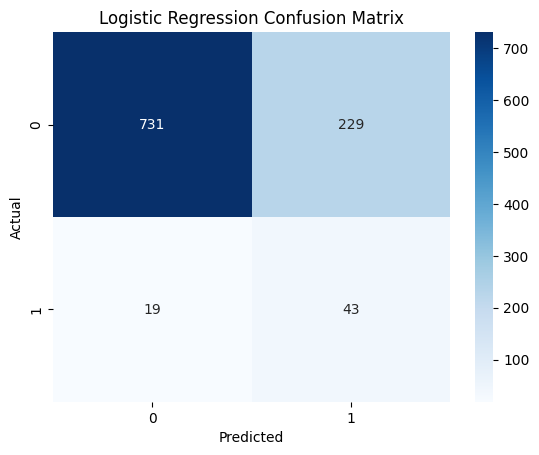

In [78]:
# 14. Evaluate Model Performance After Threshold Adjustment
print(f"\n=== Model Performance with Threshold = {threshold} ===")
print("Confusion Matrix:")

sns.heatmap(confusion_matrix(y_test, y_pred_threshold), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---
---

### **Decision Tree**

In [79]:
# 1. Import Required Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, precision_recall_curve
)
import numpy as np

# 2. Define Hyperparameter Grid
param_grid = {
    'max_depth': [3, 5, 10, None],           # Control tree depth
    'min_samples_split': [2, 5, 10],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples at leaf node
    'class_weight': ['balanced', None]       # Handle imbalanced data
}

# 3. Initialize GridSearchCV with Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=param_grid,
    scoring='recall',  # Optimize for recall to reduce False Negatives
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# 4. Fit GridSearchCV on Resampled Data
grid_search_dt.fit(x_train_resampled, y_train_resampled)

# 5. Retrieve the Best Model and Parameters
best_dt_model = grid_search_dt.best_estimator_

# 6. Make Predictions on Test Data
y_prob_dt = best_dt_model.predict_proba(x_test_preprocessed)[:, 1]  # Probability estimates

# 7. Adjust Threshold to Further Reduce False Negatives
threshold = 0.6  # Example threshold, can be tuned
y_pred_threshold_dt = (y_prob_dt >= threshold).astype(int)


accuracy_dt = accuracy_score(y_test, y_pred_threshold_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Decision Tree Accuracy: 0.8786692759295499


In [80]:
# 8. Evaluate Model Performance with Threshold Adjustment
print("\nClassification Report:")
print(classification_report(y_test, y_pred_threshold_dt))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       960
           1       0.12      0.16      0.14        62

    accuracy                           0.88      1022
   macro avg       0.53      0.54      0.54      1022
weighted avg       0.89      0.88      0.89      1022




=== Performance with Threshold = 0.6 ===
Confusion Matrix:


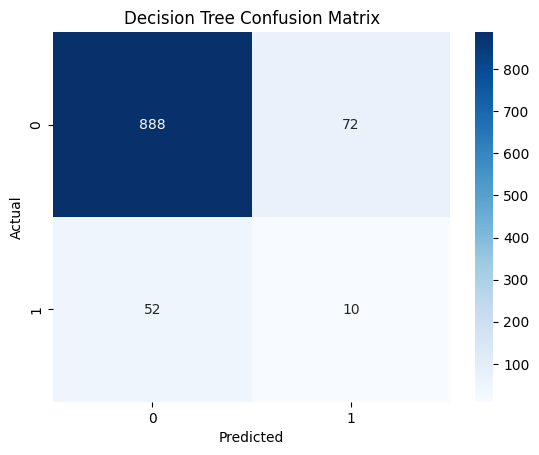

In [81]:
print(f"\n=== Performance with Threshold = {threshold} ===")
print("Confusion Matrix:")


sns.heatmap(confusion_matrix(y_test, y_pred_threshold_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---
---

### **Random Forest**

In [82]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score
)

# 1. Define Hyperparameter Grid (Reduced Search Space)
param_grid = {
    'n_estimators': [100, 150, 200],  # Fewer values for faster tuning
    'max_depth': [10, 20, None],  # Include None for no depth limit
    'min_samples_split': [2, 5],  # Reasonable range
    'min_samples_leaf': [1, 2],   # Only minimal range
    'max_features': ['sqrt', 'log2']  # Avoid None for efficiency
}

# 2. Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# 3. Set up RandomizedSearchCV for Faster Search
cv = KFold(n_splits=3, shuffle=True, random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=10,  # Limit to 10 parameter combinations
    scoring='recall',  # Optimize for recall
    cv=cv,
    n_jobs=-1,  # Use all available CPU cores
    verbose=1,
    random_state=42
)

# 4. Fit RandomizedSearchCV on Resampled Data
random_search_rf.fit(x_train_resampled, y_train_resampled)

# 5. Retrieve Best Model and Parameters
best_params_rf = random_search_rf.best_params_
best_rf_model = random_search_rf.best_estimator_

print("Best Hyperparameters (Optimized for Recall):")
print(best_params_rf)

# 6. Train Accuracy on Resampled Data
train_accuracy = accuracy_score(y_train_resampled, best_rf_model.predict(x_train_resampled))
print(f"Train Accuracy: {train_accuracy}")

# 7. Cross-Validation Performance
scores_rf = cross_val_score(best_rf_model, x_train_resampled, y_train_resampled, cv=cv, scoring='recall')
print(f"Random Forest Cross-validation scores (Recall): {scores_rf}")
print(f"Mean Recall: {np.mean(scores_rf)}")
print(f"Standard Deviation: {np.std(scores_rf)}")

# 8. Make Predictions on Test Data Using Threshold
# Get the predicted probabilities for the positive class (class 1)
y_prob_rf = best_rf_model.predict_proba(x_test_preprocessed)[:, 1]

# Apply the threshold of 0.6 to convert probabilities into binary predictions
threshold = 0.6
y_pred_rf_threshold = np.where(y_prob_rf >= threshold, 1, 0)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters (Optimized for Recall):
{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Train Accuracy: 0.9886494069633975
Random Forest Cross-validation scores (Recall): [0.95948012 0.97054381 0.95795107]
Mean Recall: 0.9626583331023587
Standard Deviation: 0.005610705229418849


In [83]:
# 9. Evaluate on Test Data with Threshold
accuracy_rf_threshold = accuracy_score(y_test, y_pred_rf_threshold)
print(f"Random Forest Accuracy: {accuracy_rf_threshold}")

Random Forest Accuracy: 0.9197651663405088


In [84]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_threshold))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       960
           1       0.14      0.06      0.09        62

    accuracy                           0.92      1022
   macro avg       0.54      0.52      0.52      1022
weighted avg       0.89      0.92      0.91      1022



Confusion Matrix:


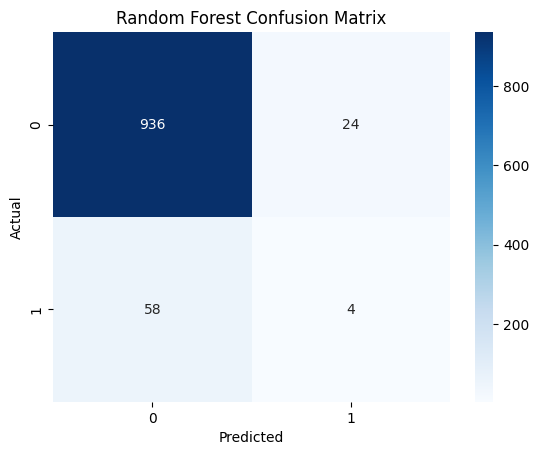

In [85]:
# 10. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf_threshold)
print("Confusion Matrix:")

sns.heatmap(confusion_matrix(y_test,y_pred_rf_threshold), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


---
---

### **xgboost**

In [86]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, precision_recall_curve
)
import numpy as np

# 1. Define Hyperparameter Distribution
param_distributions = {
    'n_estimators': [100, 200, 300, 400],      # Number of trees
    'max_depth': [3, 5, 10],                   # Control tree depth
    'learning_rate': [0.01, 0.1, 0.2],         # Step size shrinkage
    'subsample': [0.5, 0.6, 0.7, 0.8],         # Fraction of samples used for fitting
    'colsample_bytree': [0.5, 0.6, 0.7],       # Fraction of features used for fitting
    'gamma': [0, 0.1],                         # Minimum loss reduction for a split
    'reg_alpha': [0, 0.1]                      # L1 regularization
}

# 2. Initialize XGBoost Classifier
xg_model = XGBClassifier(random_state=42)

# 3. Initialize RandomizedSearchCV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
randomized_search_xg = RandomizedSearchCV(
    estimator=xg_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of random combinations to try
    scoring='recall',  # Optimize for recall to reduce False Negatives
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# 4. Fit RandomizedSearchCV on Resampled Data
randomized_search_xg.fit(x_train_resampled, y_train_resampled)

# 5. Retrieve the Best Model and Parameters
best_params_xg = randomized_search_xg.best_params_
best_xg_model = randomized_search_xg.best_estimator_

print("Best Hyperparameters (Optimized for Recall):")
print(best_params_xg)

# 6. Make Predictions on Test Data
y_prob_xg = best_xg_model.predict_proba(x_test_preprocessed)[:, 1]  # Probability estimates

# 7. Adjust Threshold to Further Reduce False Negatives
threshold = 0.6  # Example threshold, can be tuned
y_pred_threshold_xg = (y_prob_xg >= threshold).astype(int)

accuracy_xg = accuracy_score(y_test, y_pred_threshold_xg)
print(f"XGboost Accuracy: {accuracy_xg}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters (Optimized for Recall):
{'subsample': 0.8, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.7}
XGboost Accuracy: 0.9099804305283757


In [87]:
# 8. Evaluate Performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred_threshold_xg))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       960
           1       0.14      0.10      0.12        62

    accuracy                           0.91      1022
   macro avg       0.54      0.53      0.53      1022
weighted avg       0.89      0.91      0.90      1022




=== Performance with Threshold = 0.6 ===
Confusion Matrix:


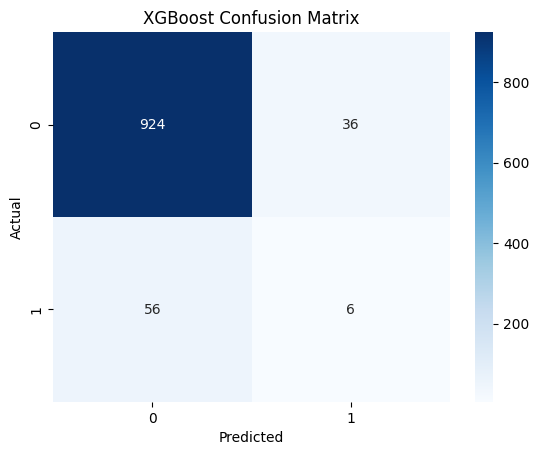

In [88]:
print(f"\n=== Performance with Threshold = {threshold} ===")
print("Confusion Matrix:")

sns.heatmap(confusion_matrix(y_test, y_pred_threshold_xg), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---
---

### **Support Vector Classifier**

In [89]:
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# 1. Define Narrowed Hyperparameter Distributions for Randomized Search
param_dist = {
    'C': uniform(0.1, 10),  # Narrowed range for C
    'kernel': ['linear', 'rbf'],  # Considering linear and rbf kernels
    'gamma': ['scale', 'auto'],  # Kernel coefficient options
    'coef0': uniform(0.0, 0.1)  # Narrowed range for coef0
}

# 2. Initialize SVC Classifier (or LinearSVC for linear kernel)
svc_model = SVC(random_state=42, probability=True)  # Probability estimates enabled for threshold tuning

# 3. Initialize RandomizedSearchCV with Reduced Parameters
cv = KFold(n_splits=3, shuffle=True, random_state=42)  # Reduced K-Folds to 3 for faster evaluation
random_search_svc = RandomizedSearchCV(
    estimator=svc_model,
    param_distributions=param_dist,
    scoring='recall',  # Optimizing for recall
    cv=cv,
    n_iter=10,  # Reduced number of iterations for faster search
    n_jobs=-1,  # Parallelize across all available CPUs
    verbose=2,
    random_state=42
)

# 4. Fit RandomizedSearchCV on Resampled Data
random_search_svc.fit(x_train_resampled, y_train_resampled)

# 5. Retrieve the Best Model and Parameters
best_params_svc = random_search_svc.best_params_
best_svc_model = random_search_svc.best_estimator_

print("Best Hyperparameters (Optimized for Recall):")
print(best_params_svc)

# 6. Evaluate Performance on Training Data
train_accuracy = accuracy_score(y_train_resampled, best_svc_model.predict(x_train_resampled))
print(f"Train Accuracy: {train_accuracy}")

# 7. Cross-Validation Performance
scores = cross_val_score(best_svc_model, x_train_resampled, y_train_resampled, cv=cv, scoring='recall')
print(f"SVC Cross-validation scores (Recall): {scores}")
print(f"Mean Recall: {np.mean(scores)}")
print(f"Standard Deviation: {np.std(scores)}")

# 8. Make Predictions on Test Data
y_prob_svc = best_svc_model.predict_proba(x_test_preprocessed)[:, 1]  # Probability estimates

# 9. Adjust Threshold to Further Reduce False Negatives
threshold = 0.6  # Example threshold, can be tuned
y_pred_threshold_svc = (y_prob_svc >= threshold).astype(int)




Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters (Optimized for Recall):
{'C': 4.660699842170359, 'coef0': 0.07851759613930137, 'gamma': 'scale', 'kernel': 'rbf'}
Train Accuracy: 0.9307486290014029
SVC Cross-validation scores (Recall): [0.96330275 0.97129909 0.96330275]
Mean Recall: 0.9659681994142483
Standard Deviation: 0.003769511467840351


In [90]:

print(f"SVC Accuracy: {accuracy_score(y_test, y_pred_threshold_svc)}")

SVC Accuracy: 0.8639921722113503


In [91]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_threshold_svc))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.13      0.23      0.17        62

    accuracy                           0.86      1022
   macro avg       0.54      0.57      0.55      1022
weighted avg       0.90      0.86      0.88      1022



Confusion Matrix:


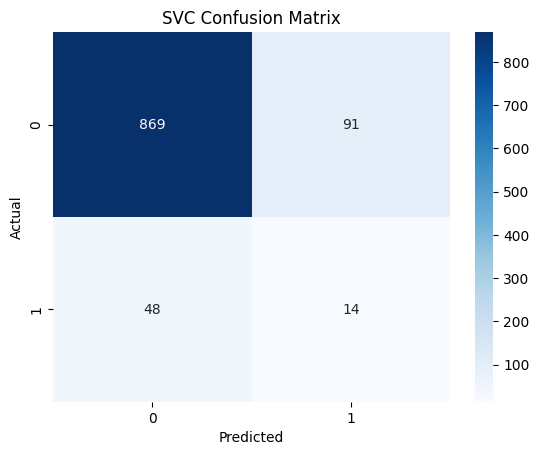

In [92]:
print("Confusion Matrix:")

sns.heatmap(confusion_matrix(y_test, y_pred_threshold_svc), annot=True, fmt='d', cmap='Blues')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

---
---

## **Objective: Stroke Prediction Model Selection**

- The objective of this project is to develop and evaluate machine learning models to accurately predict stroke occurrences in patients. Given the critical nature of stroke diagnosis, the primary focus is to minimize False Negatives (FN)—cases where a patient has a stroke, but the model incorrectly predicts no stroke. Such errors can lead to missed treatment opportunities and severe health consequences.

- The project involved exploring various machine learning algorithms and optimizing the models for high recall on the positive class (stroke cases). This ensures the model maximizes True Positives (TP), capturing as many actual stroke cases as possible.

- After testing **Logistic Regression**, **Random Forest**, **Decision Tree**, **xgboost**, **SVC**

- **`Logistic Regression`** emerged as the best-performing model. It achieved the lowest False Negative rate, misclassifying only 4 stroke patients as non-stroke cases, while maintaining a high recall for the positive class. This model was selected as the optimal solution due to its superior ability to identify stroke cases accurately

---
---

#### **Saving the pipeline `(model + preprocessing)` into a file for deployment**

In [93]:
import joblib
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ 
    ('preprocessor', preprocessor), 
    ('model', LRG_Model) 
])


# Save the entire pipeline (preprocessing + model) using joblib
joblib.dump(pipeline, 'ML_Model_For_Stroke_predection.pkl')

print("Model pipeline saved successfully!")

Model pipeline saved successfully!


---
---

# **Visualizations**

- ##### **1. Class Distribution Before and After Resampling**

In [94]:
import plotly.express as px

# Class distribution before resampling
class_counts_before = y_train.value_counts().reset_index()
class_counts_before.columns = ['Stroke', 'Count']
class_counts_before['Dataset'] = 'Before Resampling'

# Class distribution after resampling
class_counts_after = y_train_resampled.value_counts().reset_index()
class_counts_after.columns = ['Stroke', 'Count']
class_counts_after['Dataset'] = 'After Resampling'

# Combine dataframes
class_counts = pd.concat([class_counts_before, class_counts_after])

# Plot
fig = px.bar(class_counts, x='Dataset', y='Count', color='Stroke', barmode='group',
             title='Class Distribution Before and After Resampling')
fig.show()


- ##### **2. Age Group vs Stroke Incidence**

In [95]:
import plotly.express as px

# Combine data
age_group_stroke = pd.DataFrame({'Age Group': x_test['age'], 'Stroke': y_test})

# Plot
fig = px.bar(age_group_stroke, x='Age Group', color='Stroke', barmode='group',
             title='Stroke Incidence Across Age Groups')
fig.show()



- ##### **3. Glucose Levels vs Stroke Prediction**

In [96]:
import plotly.express as px

# Combine data
glucose_stroke = pd.DataFrame({'Avg Glucose Level': x_test['avg_glucose_level'], 
                               'Stroke Probability': y_prob, 
                               'Stroke': y_test})

# Plot
fig = px.scatter(glucose_stroke, x='Avg Glucose Level', y='Stroke Probability', color='Stroke', 
                 title='Glucose Levels vs Stroke Prediction')
fig.show()


- ##### **4. BMI vs Stroke Prediction (Categorized by Smoking Status)**

In [97]:
import plotly.express as px

# Combine data
bmi_stroke = pd.DataFrame({'BMI': x_test['bmi'], 'Stroke Probability': y_prob, 
                           'Smoking Status': x_test['smoking_status']})

# Plot
fig = px.box(bmi_stroke, x='Smoking Status', y='Stroke Probability', color='Smoking Status',
             title='BMI vs Stroke Prediction Categorized by Smoking Status')
fig.show()


- ##### **5. Waterfall Plot for Feature Importance in Misclassifications**
 Visualize the top features that contributed to the misclassification of strokes (False Negatives or False Positives). This waterfall chart dynamically shows the cumulative impact of features

In [98]:
import plotly.graph_objects as go
import numpy as np

# Assuming you have calculated feature importances and misclassified points
# This is a mock example with feature importances
features = ['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'hypertension']
importances = np.random.rand(5)  # Replace this with actual feature importances for misclassified cases

# Waterfall plot
fig = go.Figure(go.Waterfall(
    name = "Feature Importance",
    orientation = "v",
    measure = ["relative"] * len(features),
    x = features,
    y = importances,
    decreasing = {"marker":{"color":"red"}},
    increasing = {"marker":{"color":"green"}},
    totals = {"marker":{"color":"blue"}}
))

fig.update_layout(title="Feature Importance in Misclassifications", xaxis_title="Features", yaxis_title="Impact")
fig.show()
